# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from citipy import citipy

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Import the OpenWeatherMap API key

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marine corps base hawaii - mcbh
Processing Record 2 of Set 1 | cockburn town
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | taiohae
City not found. Skipping... Error: 'coord'
Processing Record 6 of Set 1 | barhi
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | medemblik
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | severo-yeniseyskiy
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | palu
Processing Record 14 of Set 1 | san julian
Processing Record 15 of Set 1 | gadzhiyevo
Processing Record 16 of Set 1 | cottage grove
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | muzaffarpur
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | black

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marine corps base hawaii - mcbh,21.4453,-157.7513,79.45,88,64,4.00,US,1725200433
1,cockburn town,21.4612,-71.1419,83.98,75,95,20.49,TC,1725200434
2,ribeira grande,38.5167,-28.7000,77.77,57,20,17.27,PT,1725200436
3,enewetak,11.3474,162.3373,84.51,76,100,15.90,MH,1725200437
4,barhi,23.9000,80.8000,79.57,87,84,7.94,IN,1725200439
...,...,...,...,...,...,...,...,...,...
569,lamu,-2.2717,40.9020,77.41,77,15,15.90,KE,1725201100
570,oyama,36.3000,139.8000,81.03,83,100,7.72,JP,1725201101
571,tsiombe,-25.3000,45.4833,66.38,74,74,14.70,MG,1725201102
572,nouna,12.7333,-3.8667,81.50,78,100,9.93,BF,1725201103


In [6]:
# Display sample data
# Export the City_Data into a csv
import os

# Define the directory and file path
output_dir = "output_data"
output_file = os.path.join(output_dir, "cities.csv")

# Create the directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the DataFrame to a CSV file
city_data_df.to_csv(output_file, index_label="City_ID")
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marine corps base hawaii - mcbh,21.4453,-157.7513,79.45,88,64,4.00,US,1725200433
1,cockburn town,21.4612,-71.1419,83.98,75,95,20.49,TC,1725200434
2,ribeira grande,38.5167,-28.7000,77.77,57,20,17.27,PT,1725200436
3,enewetak,11.3474,162.3373,84.51,76,100,15.90,MH,1725200437
4,barhi,23.9000,80.8000,79.57,87,84,7.94,IN,1725200439
...,...,...,...,...,...,...,...,...,...
569,lamu,-2.2717,40.9020,77.41,77,15,15.90,KE,1725201100
570,oyama,36.3000,139.8000,81.03,83,100,7.72,JP,1725201101
571,tsiombe,-25.3000,45.4833,66.38,74,74,14.70,MG,1725201102
572,nouna,12.7333,-3.8667,81.50,78,100,9.93,BF,1725201103


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Display sample data
city_data_df.head()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marine corps base hawaii - mcbh,21.4453,-157.7513,79.45,88,64,4.00,US,1725200433
1,cockburn town,21.4612,-71.1419,83.98,75,95,20.49,TC,1725200434
2,ribeira grande,38.5167,-28.7000,77.77,57,20,17.27,PT,1725200436
3,enewetak,11.3474,162.3373,84.51,76,100,15.90,MH,1725200437
4,barhi,23.9000,80.8000,79.57,87,84,7.94,IN,1725200439
...,...,...,...,...,...,...,...,...,...
569,lamu,-2.2717,40.9020,77.41,77,15,15.90,KE,1725201100
570,oyama,36.3000,139.8000,81.03,83,100,7.72,JP,1725201101
571,tsiombe,-25.3000,45.4833,66.38,74,74,14.70,MG,1725201102
572,nouna,12.7333,-3.8667,81.50,78,100,9.93,BF,1725201103


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

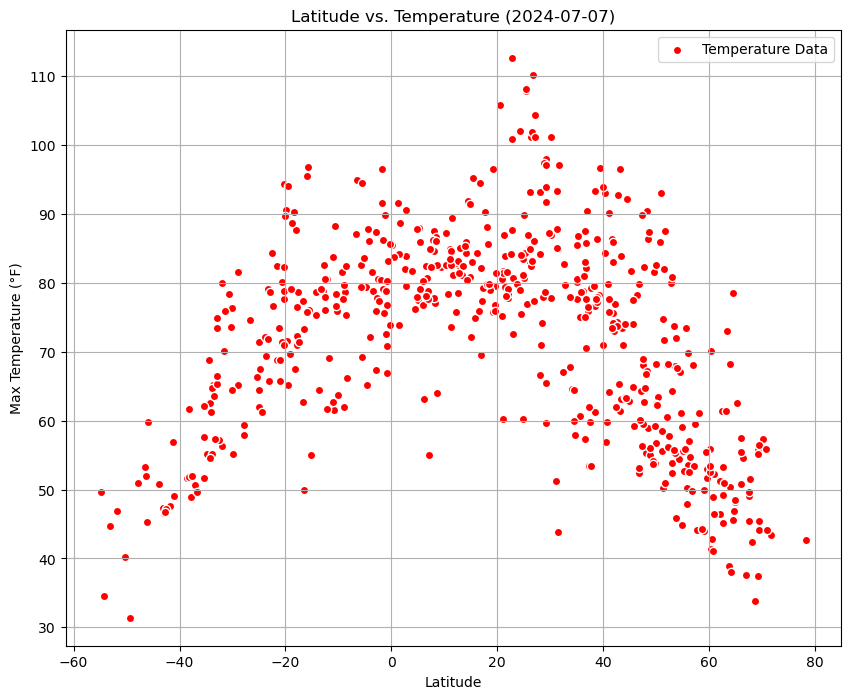

In [9]:
# Build scatter plot for latitude vs. temperature
# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Extract the relevant data for plotting
latitudes = city_data_df['Lat']
temperatures = city_data_df['Max Temp']

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(latitudes, temperatures, c='red', edgecolors='w', label='Temperature Data')
plt.title('Latitude vs. Temperature (2024-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.legend()
plt.grid(True)  # Optional: adds a grid to the plot for better readability
plt.show()

#### Latitude Vs. Humidity

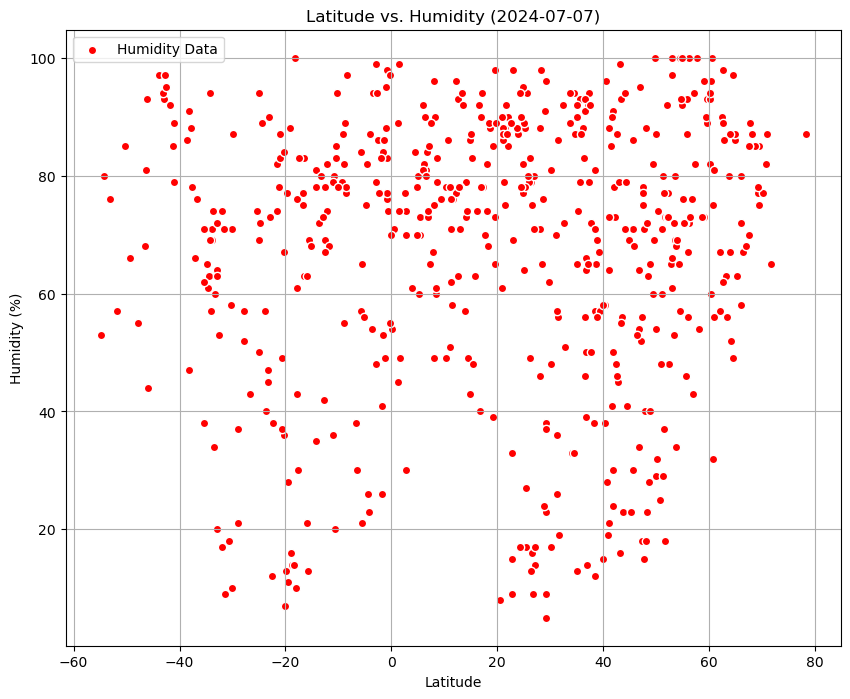

In [10]:
 #Build the scatter plots for latitude vs. humidity
# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Extract the relevant data for plotting
latitudes = city_data_df['Lat']
humidities = city_data_df['Humidity']

# Create the scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 8))
plt.scatter(latitudes, humidities, c='red', edgecolors='w', label='Humidity Data')
plt.title('Latitude vs. Humidity (2024-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)  # Adds a grid to the plot for better readability

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

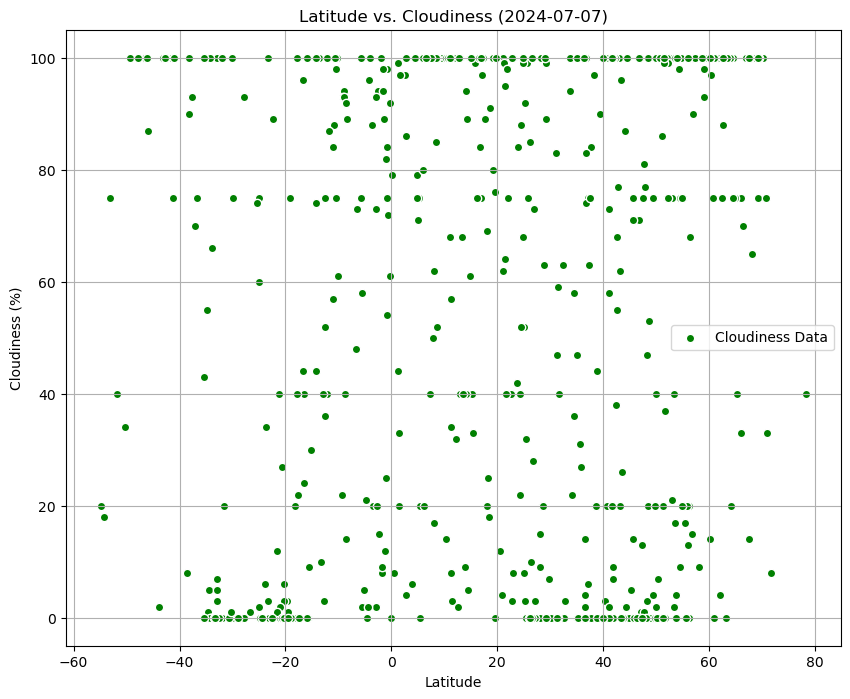

In [11]:
# Build the scatter plots for latitude vs. cloudiness

# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Extract the relevant data for plotting
latitudes = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Create the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 8))
plt.scatter(latitudes, cloudiness, c='green', edgecolors='w', label='Cloudiness Data')
plt.title('Latitude vs. Cloudiness (2024-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend()
plt.grid(True)  # Adds a grid to the plot for better readability

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

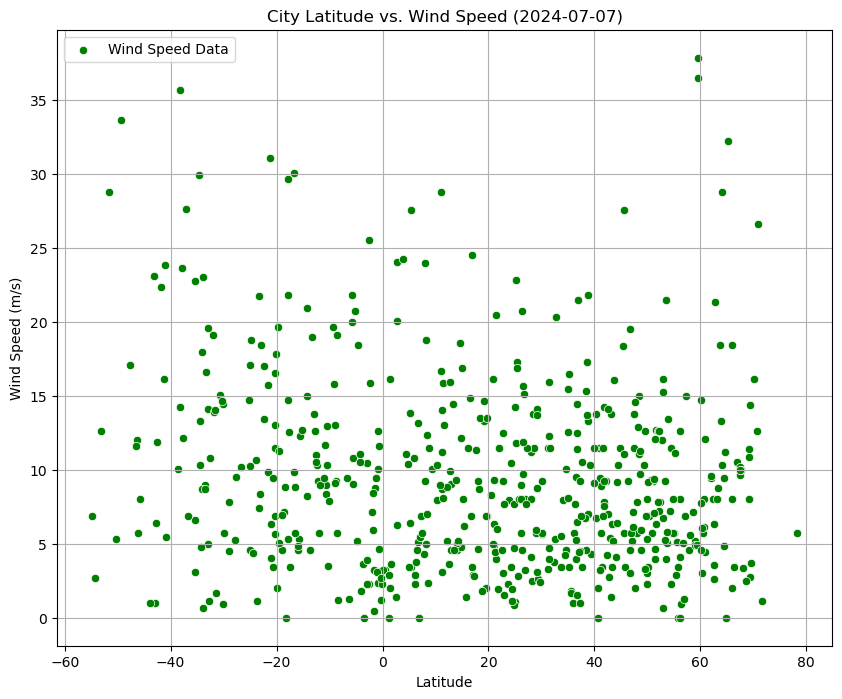

In [12]:
# Build the scatter plots for Latitude vs. Wind Speed

# Extract the relevant data for plotting
latitudes = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Create the scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 8))
plt.scatter(latitudes, wind_speed, c='green', edgecolors='w', linewidth=0.5, label='Wind Speed Data')
plt.title('City Latitude vs. Wind Speed (2024-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)  # Adds a grid to the plot for better readability

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


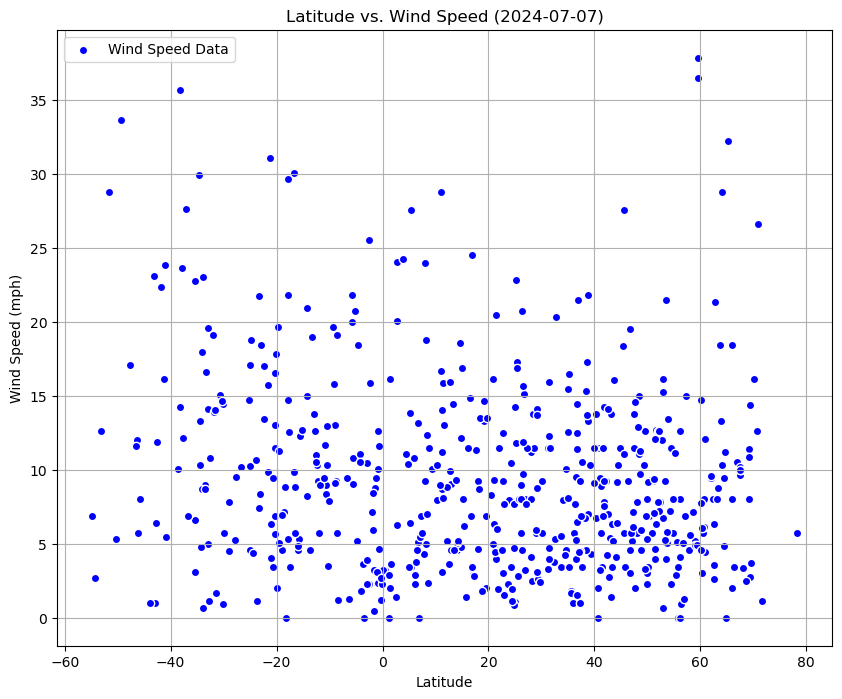

In [13]:
# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Extract the relevant data for plotting
latitudes = city_data_df['Lat']
wind_speeds = city_data_df['Wind Speed']

# Create the scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 8))
plt.scatter(latitudes, wind_speeds, c='blue', edgecolors='w', label='Wind Speed Data')
plt.title('Latitude vs. Wind Speed (2024-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.grid(True)  # Adds a grid to the plot for better readability

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


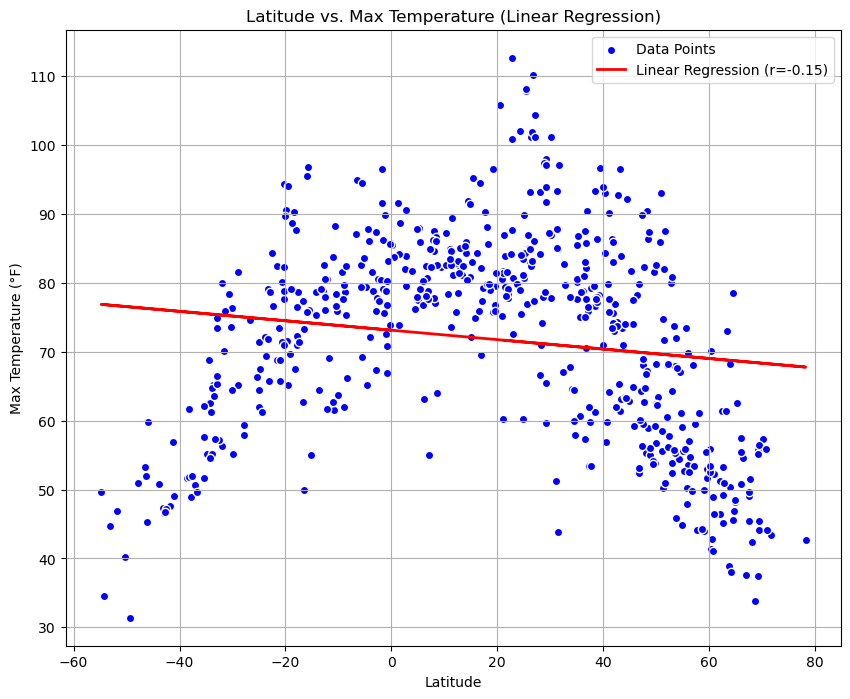

In [14]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, output_file):
    """
    Creates a scatter plot with a linear regression line.

    Parameters:
    - x_data: The x values for the scatter plot.
    - y_data: The y values for the scatter plot.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    - title: Title of the plot.
    - output_file: Path to save the output figure.
    """
    
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(x_data, y_data, color='blue', edgecolors='w', label='Data Points')
    
    # Plot the regression line
    plt.plot(x_data, slope * x_data + intercept, color='red', linewidth=2, label=f'Linear Regression (r={r_value:.2f})')
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show the plot
    plt.show()

# Example usage
# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Example: Create a linear regression plot for Latitude vs. Max Temperature
create_linear_regression_plot(
    x_data=city_data_df['Lat'],
    y_data=city_data_df['Max Temp'],
    x_label='Latitude',
    y_label='Max Temperature (°F)',
    title='Latitude vs. Max Temperature (Linear Regression)',
    output_file='output_data/Linear_Regression_Latitude_Temperature.png'
)


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with only the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display the first few rows of the Northern Hemisphere DataFrame
northern_hemisphere_df.head()
northern_hemisphere_df


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,marine corps base hawaii - mcbh,21.4453,-157.7513,79.45,88,64,4.00,US,1725200433
1,1,cockburn town,21.4612,-71.1419,83.98,75,95,20.49,TC,1725200434
2,2,ribeira grande,38.5167,-28.7000,77.77,57,20,17.27,PT,1725200436
3,3,enewetak,11.3474,162.3373,84.51,76,100,15.90,MH,1725200437
4,4,barhi,23.9000,80.8000,79.57,87,84,7.94,IN,1725200439
...,...,...,...,...,...,...,...,...,...,...
565,565,sitarganj,28.9333,79.7000,78.75,91,100,5.91,IN,1725201095
566,566,gargalianoi,37.0667,21.6333,76.51,65,6,4.43,GR,1725201097
567,567,kataba,8.4604,-0.7732,86.07,61,85,7.02,GH,1725201098
570,570,oyama,36.3000,139.8000,81.03,83,100,7.72,JP,1725201101


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with only the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()
southern_hemi_df


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,5,west island,-12.1568,96.8225,80.58,74,40,9.22,CC,1725200440
10,10,port-aux-francais,-49.3500,70.2167,31.39,66,100,33.69,TF,1725200446
11,11,palu,-0.8917,119.8707,76.75,98,84,2.35,ID,1725200447
15,15,carnarvon,-24.8667,113.6333,67.44,72,0,18.79,AU,1725200451
18,18,blackmans bay,-43.0167,147.3167,46.53,93,100,1.01,AU,1725200455
...,...,...,...,...,...,...,...,...,...,...
564,564,camana,-16.6228,-72.7111,62.78,77,44,9.86,PE,1725201093
568,568,gweru,-19.4500,29.8167,65.25,28,0,11.30,ZW,1725201099
569,569,lamu,-2.2717,40.9020,77.41,77,15,15.90,KE,1725201100
571,571,tsiombe,-25.3000,45.4833,66.38,74,74,14.70,MG,1725201102


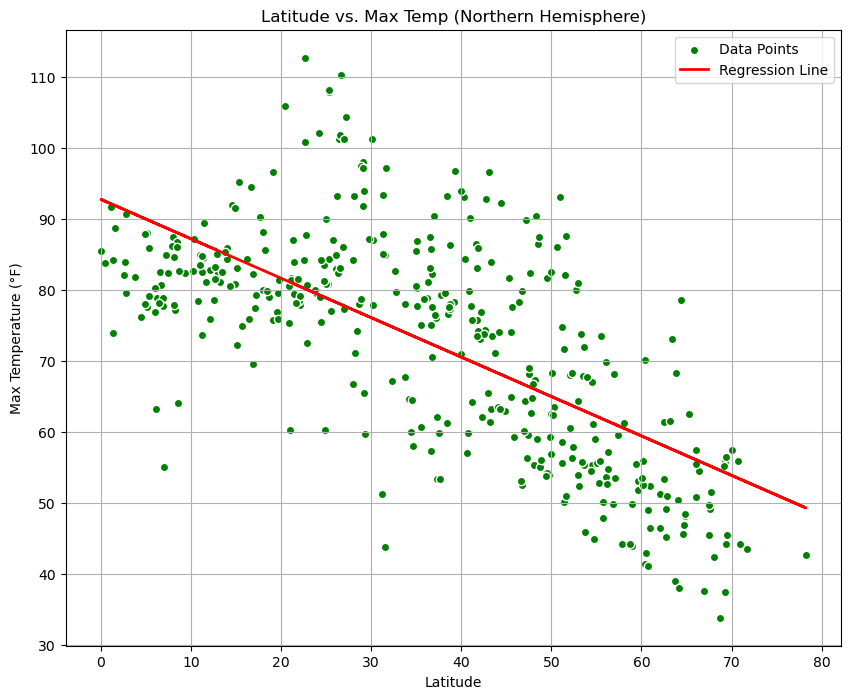

In [17]:
# Latitude vs Max Temp Northern Hemisphere

# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on Latitude vs. Temperature
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the regression line values
regress_values = x * slope + intercept

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='green', edgecolors='w', label='Data Points')
plt.plot(x, regress_values, color='red', linewidth=2, label='Regression Line')
plt.title('Latitude vs. Max Temp (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.legend()
plt.grid(True)
plt.savefig("output_data/Lat_vs_MaxTemp_NorthernHemisphere.png")
plt.show()


### Latitude vs Temperature Southern Hemisphere

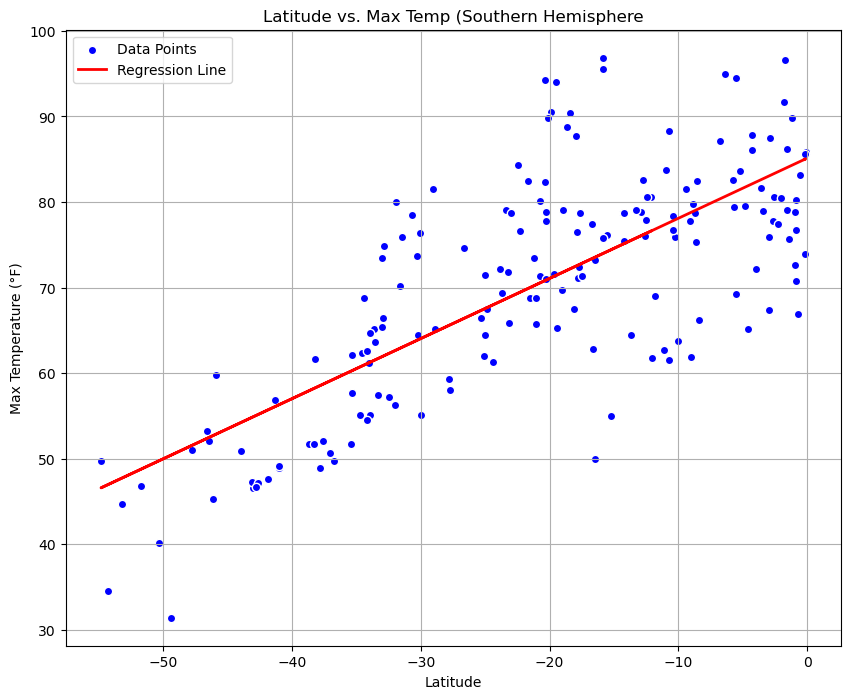

In [18]:
# Latitude vs Max Temp Southern Hemisphere

# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with the Southern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on Latitude vs. Temperature
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the regression line values
regress_values = x * slope + intercept

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', edgecolors='w', label='Data Points')
plt.plot(x, regress_values, color='red', linewidth=2, label='Regression Line')
plt.title('Latitude vs. Max Temp (Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.legend()
plt.grid(True)
plt.savefig("output_data/Lat_vs_MaxTemp_SouthernHemisphere.png")
plt.show()

***Discussion about the linear relationship:*** Latitude vs Max Temperature

The relationship between latitude and maximum temperature (referred to as "Temperature") in both the Northern and Southern Hemispheres explored using linear regression analysis, presented in the scatter plots with corresponding regression lines provide insights into how temperature varies with latitude across these regions. In both Hemispheres, the scatter plots of latitude versus temperature reveal noticeable patterns of temperature variation across different latitudes. The linear regression analysis yield specific sloped and interceptd, along with R² value, indicating a moderate correlations between latitude and temperature. The slopes of the regression lines suggest that as we move away from the equator (towards higher latitudes), the temperature tends to decrease.

Comparative Analysis
When comparing the two hemispheres, both exhibit a moderate negative correlation between latitude and temperature. The scatter plots and linear regression lines highlight that temperature tends to decrease with increasing latitude in both the Northern and Southern Hemispheres. This is consistent with the understanding that regions closer to the equator receive more direct sunlight and are generally warmer, while regions further from the equator receive less direct sunlight and are cooler.

The R² values (R² = 0.64) in both hemispheres indicate that latitude is a significant predictor of temperature, explaining a moderate proportion of the variance in temperature. This similarity suggests that the fundamental relationship between latitude and temperature is consistent across both hemispheres, despite the presence of other influencing factors. However, the specific slopes and intercepts of the regression lines may differ between the hemispheres, reflecting regional climatic differences, geographical features, and other environmental factors unique to each hemisphere. These differences highlight the complexity of temperature distribution and the importance of considering a range of factors when analyzing temperature patterns.

Conclusion
In conclusion, the linear regression analysis of latitude versus maximum temperature in both the Northern and Southern Hemispheres demonstrates a moderate negative correlation. Latitude is a significant determinant of temperature in both hemispheres, with temperature decreasing as latitude increases. The findings highlight the importance of latitude in shaping temperature patterns, while also recognizing the influence of other climatic and geographical factors. A comprehensive analysis that considers these additional factors is necessary to fully understand temperature distribution across different regions.

### Humidity vs. Latitude Linear Regression Plot

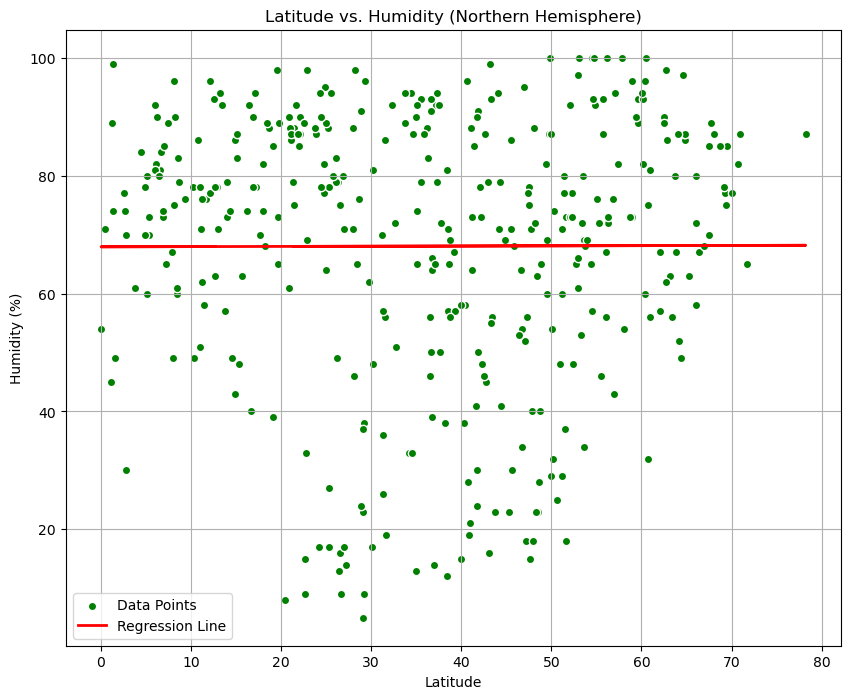

In [19]:
#Latitude vs Humidity Northern Hemisphere data (Latitude >= 0
# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on Latitude vs. Humidity
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the regression line values
regress_values = x * slope + intercept

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='green', edgecolors='w', label='Data Points')
plt.plot(x, regress_values, color='red', linewidth=2, label='Regression Line')
plt.title('Latitude vs. Humidity (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.savefig("output_data/Lat_vs_Humidity_NorthernHemisphere.png")
plt.show()


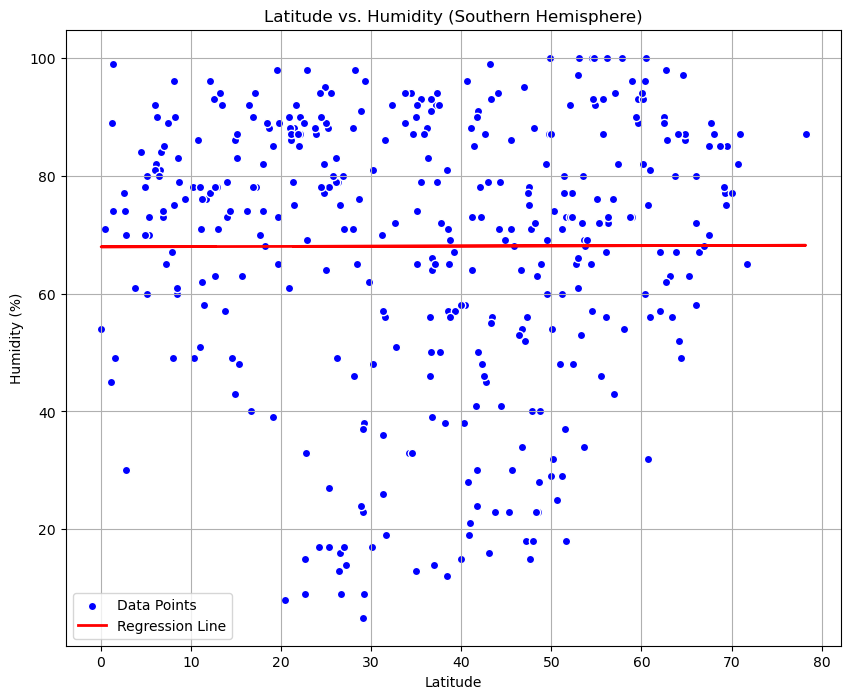

In [20]:
#Latitude vs Humidity Soutthern Hemisphere data (Latitude >= 0
# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on Latitude vs. Humidity
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the regression line values
regress_values = x * slope + intercept

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', edgecolors='w', label='Data Points')
plt.plot(x, regress_values, color='red', linewidth=2, label='Regression Line')
plt.title('Latitude vs. Humidity (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.savefig("output_data/Lat_vs_Humidity_SouthernHemisphere.png")
plt.show()

## Relationship Between Latitude and Humidity Regression in the Northern and Southern Hemispheres
Overview
This report explores the relationship between latitude and humidity in both the Northern and Southern Hemispheres by analyzing the linear regression of these variables. The analysis aims to understand how latitude influences humidity and whether this relationship differs between the two hemispheres.

Northern Hemisphere
The regression analysis of latitude versus humidity in the Northern Hemisphere reveals a weak linear relationship. The data points are widely dispersed, indicating that latitude alone does not significantly predict humidity levels. The regression line shows a slight slope, suggesting a minor trend where humidity decreases as one moves away from the equator, but the correlation is not strong. This weak relationship could be attributed to the complex interactions of various factors that influence humidity, such as proximity to oceans, local weather patterns, and seasonal variations.

Southern Hemisphere
In the Southern Hemisphere, the regression plot of latitude versus humidity also demonstrates a weak or negligible linear relationship. The scatter of data points is similar to that observed in the Northern Hemisphere, with a nearly flat regression line. This indicates that latitude has little to no effect on humidity levels in the Southern Hemisphere. The absence of a strong relationship suggests that other geographic and environmental factors, such as coastal influences, wind patterns, and topography, play a more significant role in determining humidity.

Comparative Analysis
When comparing the regression plots from both hemispheres, it is evident that latitude has a minimal impact on humidity in both regions. The weak correlation in both hemispheres suggests that while latitude is a key factor in determining temperature, its influence on humidity is much less pronounced. This highlights the complexity of humidity as a climatic variable, which is shaped by a myriad of factors beyond just geographic location.

Conclusion
The regression analysis of latitude versus humidity in both the Northern and Southern Hemispheres indicates that latitude is not a strong predictor of humidity levels. The weak linear relationships observed suggest that other environmental and geographic factors are more influential in determining humidity. This understanding is important for climate studies and helps in developing more accurate models for predicting weather patterns across different regions.

### Latitude vs Cloudiness Linear Regression Plot

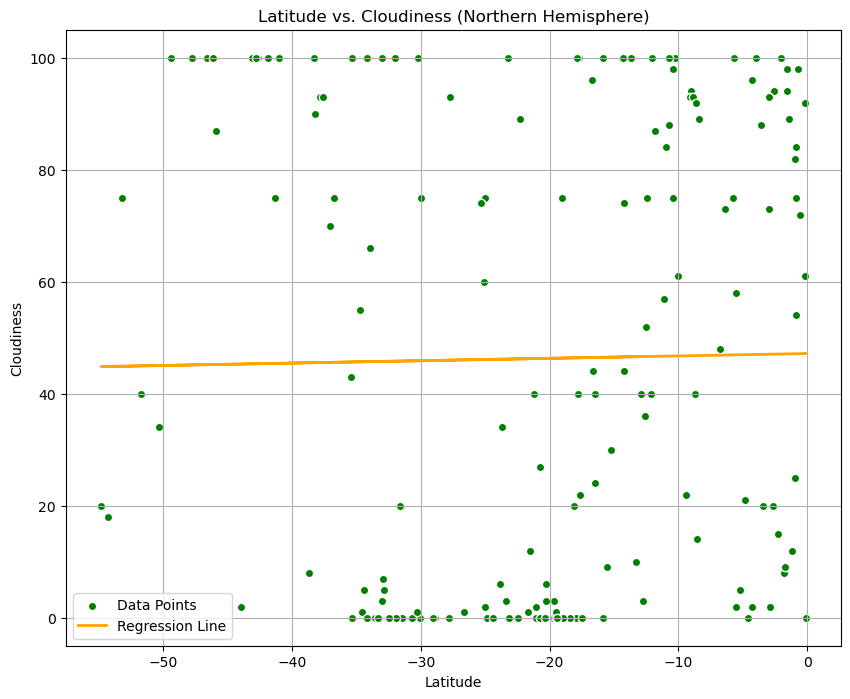

In [21]:
#Latitude vs Cloudiness Northern Hemisphere data

# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with the Northern Hemisphere data (Latitude < 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Perform linear regression on Latitude vs. Cloudiness 
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the regression line values
regress_values = x * slope + intercept

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='green', edgecolors='w', label='Data Points')
plt.plot(x, regress_values, color='orange', linewidth=2, label='Regression Line')
plt.title('Latitude vs. Cloudiness (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.grid(True)
plt.savefig("output_data/Lat_vs_Humidity_northernHemisphere.png")
plt.show()


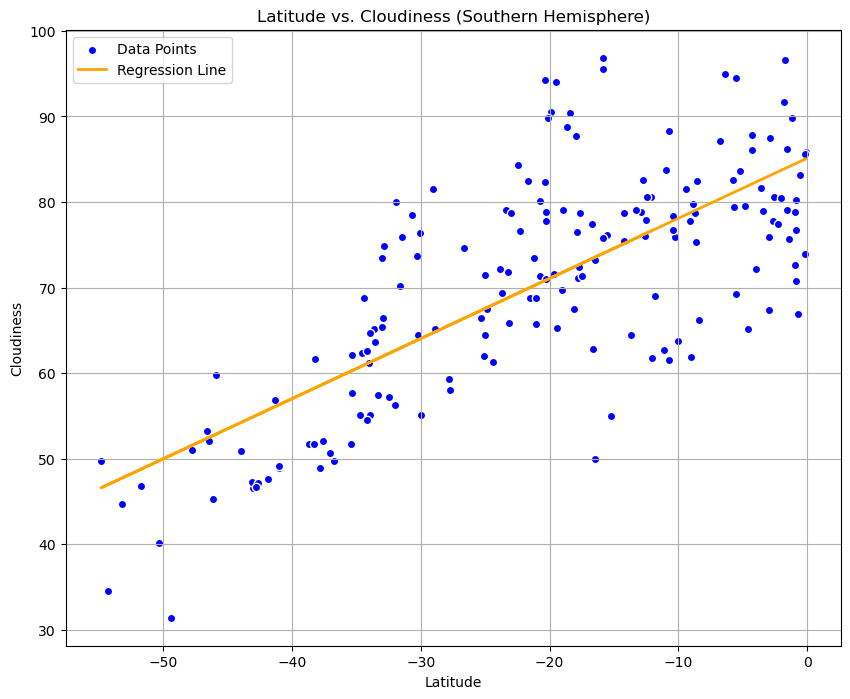

In [22]:
# Latitude vs Cloudiness on Northern Hemisphere

# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Perform linear regression on Latitude vs. Temperature
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the regression line values
regress_values = x * slope + intercept

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', edgecolors='w', label='Data Points')
plt.plot(x, regress_values, color='orange', linewidth=2, label='Regression Line')
plt.title('Latitude vs. Cloudiness (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.grid(True)
plt.savefig("output_data/Lat_vs_MaxTemp_SouthernHemisphere.png")
plt.show()


**Discussion about the linear relationship:** Latitude vs Cloudiness

Overview
 By examining the scatter plots and regression lines, we can draw insights into how cloudiness varies with latitude across these regions. In both Northern and Southern Hemispheres, the scatter plots of latitude versus cloudiness show dispersed range of cloudiness values across different latitudes. The linear regression lines, indicates a weak correlation between latitude and cloudiness. The R² values of (R²=0.01) in both cases, measure the proportions of the variances in cloudiness that can be explained by latitude, is relatively low , suggesting that latitude is not a strong predictor of cloudiness in both cases.

Comparative Analysis
When comparing the two hemispheres, it is evident that the relationship between latitude and cloudiness is weak in both cases. The scatter plots and linear regression lines reveal that latitude is not a strong determinant of cloudiness levels in either hemisphere. This finding underscores the importance of considering a wider range of factors when analyzing cloudiness patterns, including geographical, meteorological, and environmental influences.

Conclusion
In conclusion, the linear regression analysis of latitude versus cloudiness in both the Northern and Southern Hemispheres demonstrates a weak correlation. The low R² values indicate that latitude is not a significant predictor of cloudiness, pointing to the need for a broader consideration of factors influencing cloudiness levels. This analysis highlights the complexity of climatic variables and the limitations of using latitude as a sole predictor for cloudiness. Understanding the interplay of various factors is essential for a more accurate and comprehensive analysis of cloudiness distribution across the globe.

### Wind Speed vs. Latitude Linear Regression Plot

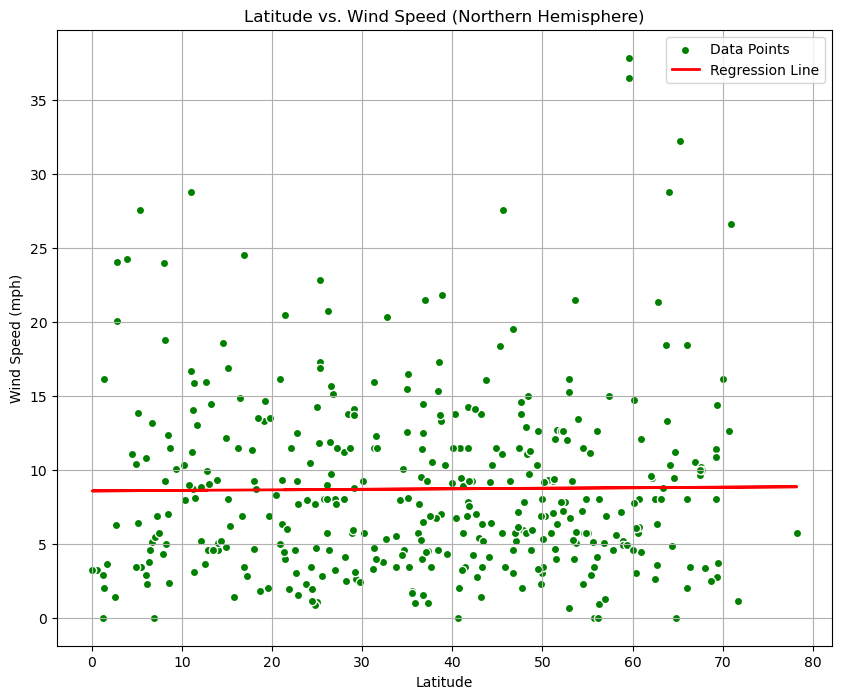

In [23]:
#Latitude vs Windspeed in Northrn Hemisphere

# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Extract Latitude and Wind Speed for regression analysis
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create regression line values
regress_values = x * slope + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='green', edgecolors='w', label='Data Points')
plt.plot(x, regress_values, color='red', linewidth=2, label='Regression Line')
plt.title('Latitude vs. Wind Speed (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.grid(True)
plt.savefig("output_data/Lat_vs_WindSpeed_NorthernHemisphere.png")
plt.show()


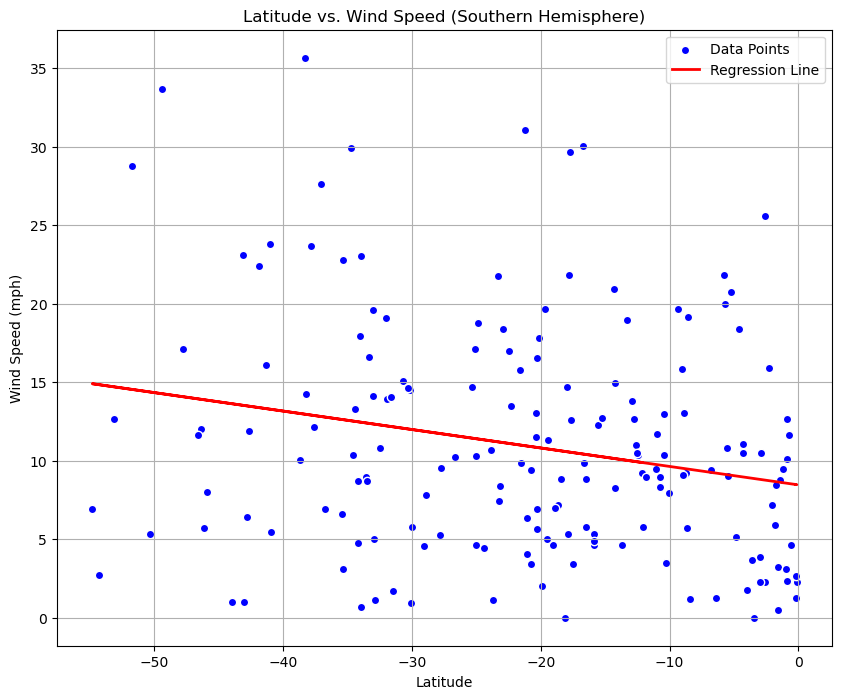

In [24]:
#Latitude vs Windspeed

# Load the city data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Extract Latitude and Wind Speed for regression analysis
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create regression line values
regress_values = x * slope + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', edgecolors='w', label='Data Points')
plt.plot(x, regress_values, color='red', linewidth=2, label='Regression Line')
plt.title('Latitude vs. Wind Speed (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.grid(True)
plt.savefig("output_data/Lat_vs_WindSpeed_SouthernHemisphere.png")
plt.show()


***Discussion about the linear relationship:*** Latitude versus Wind Speed

Correlation: Both plots presenting linear regression of Latitude versus Wind Speed in Northern and Southern hemispheres demonstrate a weak correlation between latitude and wind speed, as indicated by the low R² values (0.02). This suggests that latitude alone is not a strong predictor of wind speed.

Trend: The negative slopes in both plots suggest a slight tendency for wind speeds to decrease as latitude increases. However, the low R² values suggest that this trend is not strong and that other factors may play more significant roles in determining wind speeds. 

Data Distribution: The scatter of data points in both plots show significant variability, suggesting that wind speed is influenced by multiple factors beyond latitude, such as geographic features, weather patterns, and local conditions. These visualizations indicate that while there is a slight negative correlation between latitude and wind speed in both hemispheres, the relationship is weak. Further analysis with additional variables and more sophisticated models would be necessary to understand the factors influencing wind speed more comprehensively.